

# Project: Investigate a Dataset - [TMDb movie data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>


## Introduction



This data set contains information about 10,000 movies collected from The Movie Database (TMDb),including user ratings and revenue.The final two columns ending with '_adj show the budget and revenue of the associated movie in terms of 2010 dollars accounting for inflation over time.the data contains interesting columns such as genres, revenue,id,budjet which i would be analyzing.Below are the questions i would be asking and later find answers to them after analyzing the data.
1.how does high revenue movies relate to other parameters such as profit and budget in each year. to answer this,i will use visuals and charts to interprete resuls,moreover i will fing the estimated profit and compare it with revenue over the years 
2.which movie genre type is popular in each of the movies released.To answer this, i would run a search for all the possible movie genre types and use visuals and plots to understand them.
                                  



the code below  imports all of the packages to be used

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
df = pd.read_csv('tmdb-movies.csv')








## Data Wrangling



After importing the packages and file, the codes below will find out more details about the data such as data types in each column,find duplictes and missing values,dimensions and unique values to help me understand the data well.

the code below produces first five rows

In [2]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


 code to find out the data types

In [3]:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

code for more information about the data such as the data type and number of non nul values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

the code below gives statistical minformation about the data

In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


 code to find out duplicated rows(only one row was duplicated)

In [6]:
df[df.duplicated()]


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


code to find null values

In [7]:
null_data=df[df.isnull().any(axis=1)]
print(null_data)

           id    imdb_id  popularity     budget    revenue  \
18     150689  tt1661199    5.556818   95000000  542351353   
21     307081  tt1798684    5.337064   30000000   91709827   
26     214756  tt2637276    4.564549   68000000  215863606   
32     254470  tt2848292    3.877764   29000000  287506194   
33     296098  tt3682448    3.648210   40000000  162610473   
36     339527  tt1291570    3.358321          0   22354572   
38     241554  tt2199571    3.237370   50000000   71561644   
42     321697  tt2080374    3.079522   30000000   34441873   
43     203801  tt1638355    3.053421   75000000  108145109   
47     286565  tt3622592    2.968254   12000000   85512300   
48     265208  tt2231253    2.932340   30000000          0   
53     274479  tt2446980    2.793297   60000000  101134059   
58     306819  tt0810819    2.557859   15000000   64191523   
60     273481  tt3397884    2.487849   30000000   84025816   
69     271718  tt3152624    2.317670   35000000  140795793   
70     3

code to find unique values

In [8]:
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64


### Data Cleaning

At the cleaning stage, i would drop columns that won't be needed, change scientific notations(e) to normal figures, delete duplicate and fill missing values with mean for some columns

the data contains scientific notations this code removes scientific notations at each column where applicable
to make the data simple to analyze

In [9]:
pd.set_option('display.float_format' ,lambda x: '%.5f' % x)
df

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.98576,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.50000,2015,137999939.28003,1392445892.52380
1,76341,tt1392190,28.41994,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.10000,2015,137999939.28003,348161292.48903
2,262500,tt2908446,13.11251,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.30000,2015,101199955.47202,271619025.40763
3,140607,tt2488496,11.17310,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.50000,2015,183999919.04004,1902723129.80182
4,168259,tt2820852,9.33501,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.30000,2015,174799923.08803,1385748801.47052
5,281957,tt1663202,9.11070,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.20000,2015,124199945.35202,490314247.02173
6,87101,tt1340138,8.65436,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.80000,2015,142599937.25603,405355075.68377
7,286217,tt3659388,7.66740,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.60000,2015,99359956.28162,547749654.31015
8,211672,tt2293640,7.40416,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.50000,2015,68079970.04481,1064192016.79551
9,150540,tt2096673,6.32680,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",9

this code delete a duplicate of a row

In [10]:
df.drop_duplicates(inplace=True)

due to the large size of rows with missing values(8874 rows and 21 columns) i cant remove all, but can first fill in columns with the
mean values where applicable

In [11]:
df.fillna(df.mean())

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.98576,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.50000,2015,137999939.28003,1392445892.52380
1,76341,tt1392190,28.41994,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.10000,2015,137999939.28003,348161292.48903
2,262500,tt2908446,13.11251,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.30000,2015,101199955.47202,271619025.40763
3,140607,tt2488496,11.17310,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.50000,2015,183999919.04004,1902723129.80182
4,168259,tt2820852,9.33501,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.30000,2015,174799923.08803,1385748801.47052
5,281957,tt1663202,9.11070,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.20000,2015,124199945.35202,490314247.02173
6,87101,tt1340138,8.65436,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.80000,2015,142599937.25603,405355075.68377
7,286217,tt3659388,7.66740,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.60000,2015,99359956.28162,547749654.31015
8,211672,tt2293640,7.40416,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.50000,2015,68079970.04481,1064192016.79551
9,150540,tt2096673,6.32680,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",9

to verify  that  missing value have been filled with mean  where appropriate

In [12]:
null=df[df.isnull().any(axis=1)]
null

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
18,150689,tt1661199,5.55682,95000000,542351353,Cinderella,Lily James|Cate Blanchett|Richard Madden|Helen...,NaN,Kenneth Branagh,Midnight is just the beginning.,...,"When her father unexpectedly passes away, youn...",112,Romance|Fantasy|Family|Drama,Walt Disney Pictures|Genre Films|Beagle Pug Fi...,3/12/15,1495,6.80000,2015,87399961.54402,498963025.21627
21,307081,tt1798684,5.33706,30000000,91709827,Southpaw,Jake Gyllenhaal|Rachel McAdams|Forest Whitaker...,NaN,Antoine Fuqua,Believe in Hope.,...,"Billy ""The Great"" Hope, the reigning junior mi...",123,Action|Drama,Escape Artists|Riche-Ludwig Productions,6/15/15,1386,7.30000,2015,27599987.85601,84373003.71588
26,214756,tt2637276,4.56455,68000000,215863606,Ted 2,Mark Wahlberg|Seth MacFarlane|Amanda Seyfried|...,NaN,Seth MacFarlane,"Ted is Coming, Again.",...,Newlywed couple Ted and Tami-Lynn want to have...,115,Comedy,Universal Pictures|Media Rights Capital|Fuzzy ...,6/25/15,1666,6.30000,2015,62559972.47361,198594430.13845
32,254470,tt2848292,3.87776,29000000,287506194,Pitch Perfect 2,Anna Kendrick|Rebel Wilson|Hailee Steinfeld|Br...,NaN,Elizabeth Banks,We're back pitches,...,"The Bellas are back, and they are better than ...",115,Comedy|Music,Universal Pictures|Gold Circle Films|Brownston...,5/7/15,1264,6.80000,2015,26679988.26081,264505582.09754
33,296098,tt3682448,3.64821,40000000,162610473,Bridge of Spies,Tom Hanks|Mark Rylance|Amy Ryan|Alan Alda|Seba...,NaN,Steven Spielberg,"In the shadow of war, one man showed the world...",...,"During the Cold War, the Soviet Union captures...",141,Thriller|Drama,DreamWorks SKG|Amblin Entertainment|Studio Bab...,10/15/15,1638,7.10000,2015,36799983.80801,149601569.33531
36,339527,tt1291570,3.35832,0,22354572,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,NaN,Afonso Poyart,"A serial killer who can see your future, a psy...",...,"A psychic doctor, John Clancy, works with an F...",101,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,9/3/15,474,6.20000,2015,0.00000,20566197.19087
38,241554,tt2199571,3.23737,50000000,71561644,Run All Night,Liam Neeson|Ed Harris|Joel Kinnaman|Boyd Holbr...,NaN,Jaume Collet-Serra,No sin goes unpunished,...,Brooklyn mobster and prolific hit man Jimmy Co...,114,Action|Crime|Drama|Mystery|Thriller,Vertigo Entertainment|Energy Entertainment|Rat...,3/11/15,814,6.30000,2015,45999979.76001,65836683.51186
42,321697,tt2080374,3.07952,30000000,34441873,Steve Jobs,Michael Fassbender|Kate Winslet|Seth Rogen|Kat...,http://www.stevejobsthefilm.com,Danny Boyle,NaN,...,Set backstage at three iconic product launches...,122,History|Drama,Universal Pictures|Scott Rudin Productions|Leg...,10/9/15,1035,6.90000,2015,27599987.85601,31686509.21794
43,203801,tt1638355,3.05342,75000000,108145109,The Man from U.N.C.L.E.,Henry Cavill|Armie Hammer|Alicia Vikander|Eliz...,NaN,Guy Ritchie,Saving the world never goes out of style.,...,"At the height of the Cold War, a mysterious cr...",116,Comedy|Action|Adventure,Davis Entertainment|Warner Bros.|Wigram Produc...,8/13/15,1548,7.00000,2015,68999969.64001,99493456.50288
47,286565,tt3622592,2.96825,12000000,85512300,Paper Towns,Nat Wolff|Cara Delevingne|Halston Sage|Justice...,NaN,Jake Schreier,Get Lost. Get Found.,...,Quentin Jacobsen has spent a lifetime loving t...,109,Drama|Mystery|Romance,Fox 2000 Pictures,7/9/15,1252,6.20000,2015,11039995.14240,78671281.38464


next i would delete the homepage column since it contains a lot of missing values and also delete imdb_id column since
it is irrelevant for my analysis

In [13]:
df=df.drop(['homepage','imdb_id'],axis=1)


After discussing the structure of the data and any problems that need to be
cleaned, my final data is now ready to analyse

In [14]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 19 columns):
id                      10865 non-null int64
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
director                10821 non-null object
tagline                 8041 non-null object
keywords                9372 non-null object
overview                10861 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj              10865 non-null float64
revenue_adj             10865 non-null float64
dtypes: float64(4), in

In [15]:
df

,id,popularity,budget,revenue,original_title,cast,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.98576,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.50000,2015,137999939.28003,1392445892.52380
1,76341,28.41994,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.10000,2015,137999939.28003,348161292.48903
2,262500,13.11251,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.30000,2015,101199955.47202,271619025.40763
3,140607,11.17310,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.50000,2015,183999919.04004,1902723129.80182
4,168259,9.33501,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.30000,2015,174799923.08803,1385748801.47052
5,281957,9.11070,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",father-son relationship|rape|based on novel|mo...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.20000,2015,124199945.35202,490314247.02173
6,87101,8.65436,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,Reset the future,saving the world|artificial intelligence|cybor...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.80000,2015,142599937.25603,405355075.68377
7,286217,7.66740,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,Bring Him Home,based on novel|mars|nasa|isolation|botanist,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.60000,2015,99359956.28162,547749654.31015
8,211672,7.40416,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",assistant|aftercreditsstinger|duringcreditssti...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.50000,2015,68079970.04481,1064192016.79551
9,150540,6.32680,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,Meet the little voices inside your head.,dream|cartoon|imaginary friend|animation|kid,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Ani


## Exploratory Data Analysis


### Research Question 1(how does  high revenue movies relate to other parameters such as profit and budget in each year) 

##### i would like to find out if  high revenue from a movie means the  budget was high as well as the profit.Moreover i will find out from the exloratory if for a particular year there was a loss instead of a profit.
#### i would use the revenue_adj and budget_adjcolumn for my analysis since it account for inflation over time with 2010 dollar as the base, it will make my profit calculation more real .I would assume that budget was equal to expenditure for each year since there was no column for expenditure.



the code below gives statictical information about the revenue adjustment

In [16]:
df.revenue_adj.describe()

count        10865.00000
mean      51369001.75884
std      144638333.12899
min              0.00000
25%              0.00000
50%              0.00000
75%       33701729.00946
max     2827123750.41189
Name: revenue_adj, dtype: float64

next i will plot a histogram of the statistical information for the revenue _adj for non zero figures to create a visual representation of the reults

the code below will find the non zero values from the revenue and give ststistical information about it

In [17]:
df_rev=df[df['revenue_adj']>0]

df_rev_1=pd.DataFrame(df_rev['revenue_adj'].describe())

df_rev_1

,revenue_adj
count,4849.00000
mean,115100887.62834
std,198855667.98321
min,2.37071
25%,10465848.09117
50%,43956661.15838
75%,131648235.91364
max,2827123750.41189


In [ ]:
the code below produces a histogram of statistical information of the revenue column with non zero values

Text(0.5,1,'revenue_adj statistical information')

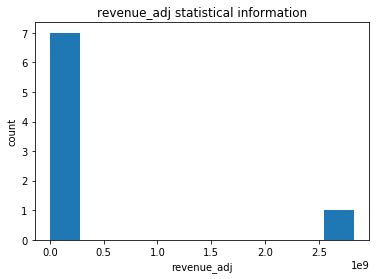

In [18]:

ax1=df_rev_1['revenue_adj'].plot.hist()
ax1.set_ylabel('count')
ax1.set_xlabel('revenue_adj')
ax1.set_title('revenue_adj statistical information')

the histogram above shows the ststistical information for the revenue_adj column greater than zero it reveals that there are few counts for the individual statistic information

next i will find out how the average revenue_adj is distributed for each year, the code below will first group the revenue adjustment into years and then plot them with a bar chart

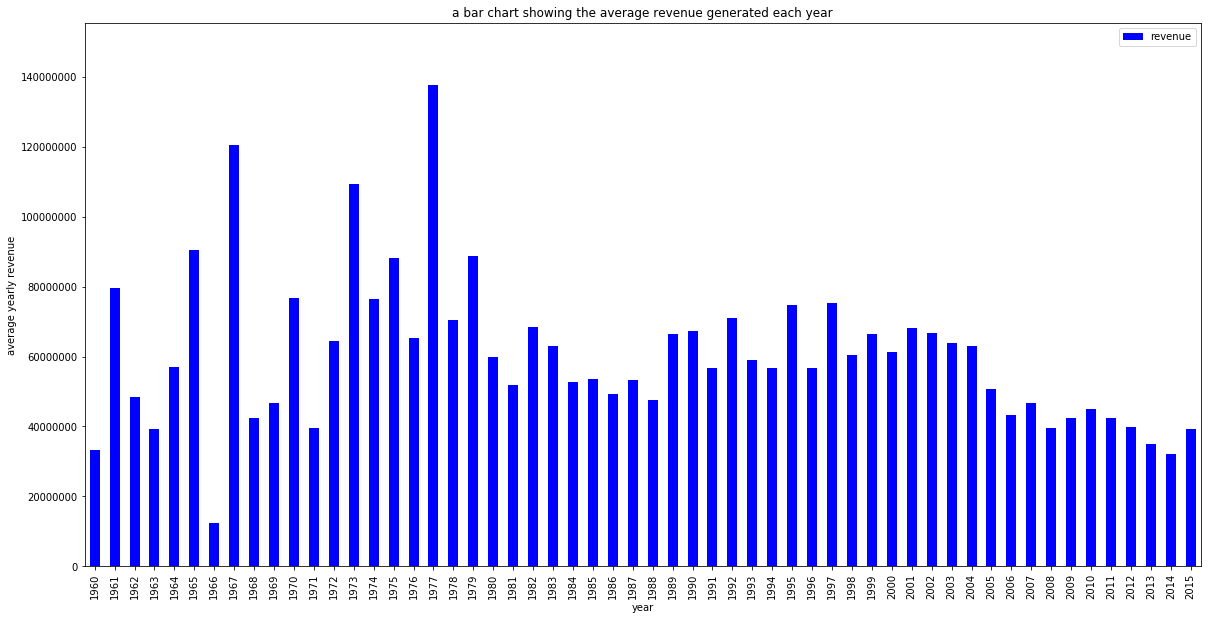

In [28]:
gr_rev=df.groupby(['release_year'])['revenue_adj'].mean()
gr_rev.plot(kind='bar',alpha=1,ylim=(0,155495693), color= 'blue',figsize=(20,10), label='revenue',title='a bar chart showing the average revenue generated each year',x='year',y='total revenue')
plt.legend()
plt.xlabel('year')
ax=plt.gca()
plt.ylabel('average yearly revenue')
ax.get_yaxis().get_major_formatter().set_scientific(False)

the bar chart above shows the distribution of the average revenue adj in every year

since i want to compare this infomation with the yearly budget, i will repeat the process for the budget_adj column

the code below first look for non zero values for the budget and give statistical information about them

In [20]:
df_budg=df[df['budget_adj']>0]

df_budg_1=pd.DataFrame(df_budg['budget_adj'].describe())

df_budg_1

,budget_adj
count,5169.00000
mean,36889069.20400
std,41960957.84807
min,0.92109
25%,8102293.07047
50%,22715052.32412
75%,50083840.34874
max,425000000.00000


the code below gives a histogram plot of the statistical information ofn the budget

Text(0.5,1,'budget_adj statistical information')

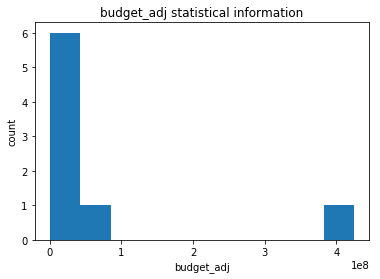

In [21]:
ax3=df_budg_1['budget_adj'].plot.hist()
ax3.set_ylabel('count')
ax3.set_xlabel('budget_adj')
ax3.set_title('budget_adj statistical information')

the graph above gives the statistical information about the budget which is almost similar to that of the revenue_adj

next i will find out how the average budget_adj is distributed for each year, the code below will first group the budget adjustment into years and then plot them with a bar chart

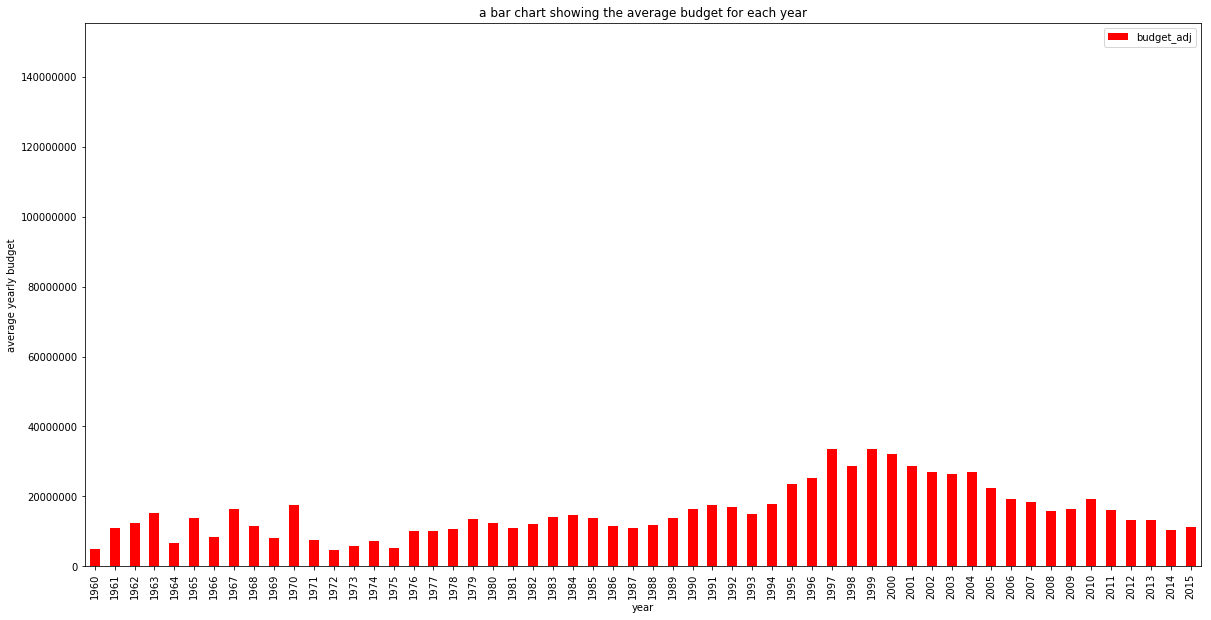

In [31]:
gr_budg=df.groupby(['release_year'])['budget_adj'].mean()
gr_budg.plot(kind='bar',alpha=1,ylim=(0,155495693), color= 'red',figsize=(20,10), label='budget_adj',title='a bar chart showing the average budget for each year',x='year',y='total budget')
plt.legend()
plt.xlabel('year')
ax=plt.gca()
plt.ylabel('average yearly budget')
ax.get_yaxis().get_major_formatter().set_scientific(False)

this bar graph above shows the average yearly budget adjustment

next i will compare the budget adjustment and the revenue adjustment with a bar graph and a scatter plot

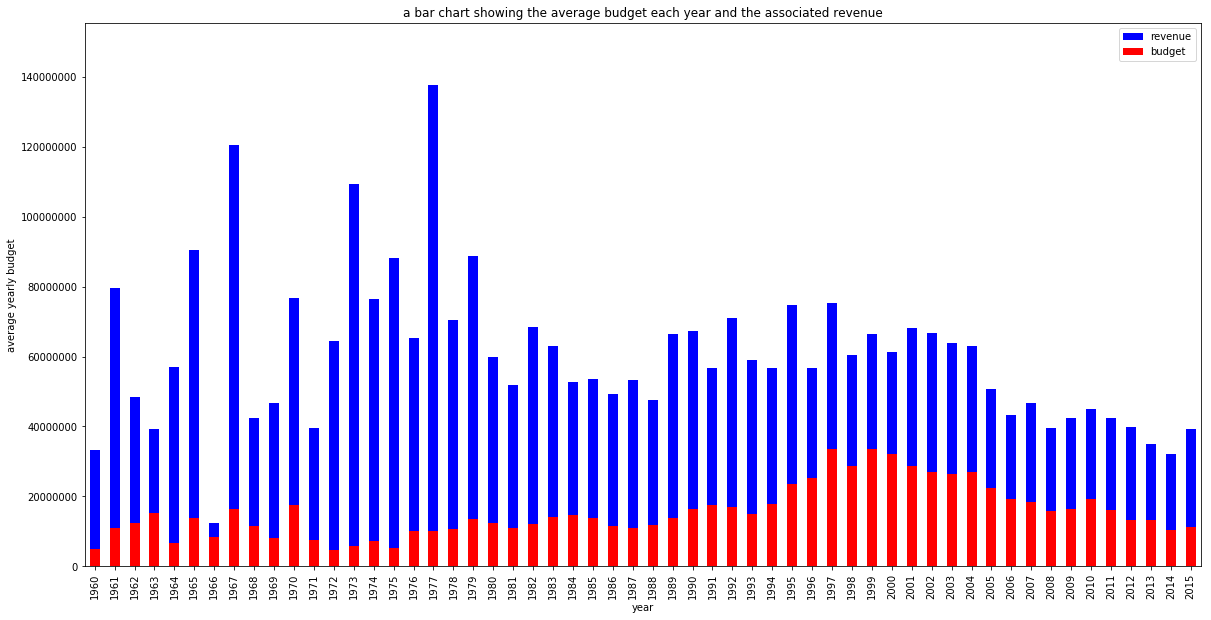

In [34]:
gr_rev.plot(kind='bar',alpha=1,ylim=(0,155495693), color= 'blue',figsize=(20,10), label='revenue',title='a bar chart showing the average revenue generated each year',x='year',y='total revenue')
plt.legend()
plt.xlabel('year')
ax=plt.gca()
plt.ylabel('average yearly revenue')
ax.get_yaxis().get_major_formatter().set_scientific(False)
gr_budg.plot(kind='bar',alpha=1,ylim=(0,155495693), color= 'red',figsize=(20,10), label='budget',title='a bar chart showing the average budget each year and the associated revenue',x='year',y='number of high revenue')
plt.legend()
plt.xlabel('year')
ax=plt.gca()
plt.ylabel('average yearly budget')
ax.get_yaxis().get_major_formatter().set_scientific(False)





the combined bar graph above compares revenue to budget,i can conclude that high years with high revenue are not highly associated with high budget  

the code below draws a scatter plot between revenue adjustment and budget adjustment

(0, 3000000000)

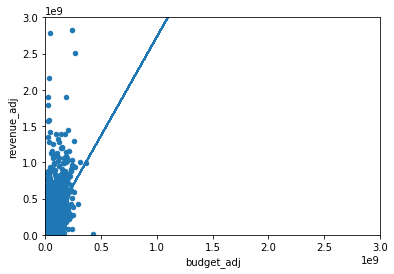

In [40]:
import statsmodels.api as sm
import scipy
bud_rev = sm.OLS(df.revenue_adj, sm.add_constant(df.budget_adj))
p= bud_rev.fit().params
x=df.revenue_adj
ax_p=df.plot(x='budget_adj', y='revenue_adj', kind='scatter')
ax_p.plot(x, p.const + p.budget_adj*x)
ax_p.set_xlim([0,3000000000])
ax_p.set_ylim([0,3000000000])


the graph shows a scatter plot for revenue and budget.Although a positive correlation exist and moves along the y axis, the relationstip is not perfect and totally linear hence i can't conclude high revenue is assiciated with high budget  

next i will compare the relationship that exist between high revenue and profit, the code below calculate the estimated profit

the code below add profit column to the data(df)

In [53]:
profit=gr_rev-gr_budg
profit
df['profit']=df
df

,id,popularity,budget,revenue,original_title,cast,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,32.98576,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.50000,2015,137999939.28003,1392445892.52380,135397
1,76341,28.41994,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.10000,2015,137999939.28003,348161292.48903,76341
2,262500,13.11251,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.30000,2015,101199955.47202,271619025.40763,262500
3,140607,11.17310,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.50000,2015,183999919.04004,1902723129.80182,140607
4,168259,9.33501,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.30000,2015,174799923.08803,1385748801.47052,168259
5,281957,9.11070,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",father-son relationship|rape|based on novel|mo...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.20000,2015,124199945.35202,490314247.02173,281957
6,87101,8.65436,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,Reset the future,saving the world|artificial intelligence|cybor...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.80000,2015,142599937.25603,405355075.68377,87101
7,286217,7.66740,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,Bring Him Home,based on novel|mars|nasa|isolation|botanist,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.60000,2015,99359956.28162,547749654.31015,286217
8,211672,7.40416,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",assistant|aftercreditsstinger|duringcreditssti...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.50000,2015,68079970.04481,1064192016.79551,211672
9,150540,6.32680,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,Meet the little voices inside your head.,dream|cartoon|imaginary friend|animation|kid,"Growing up can be a bumpy road, and it's

the code below gives a bar chart of the profit yearly

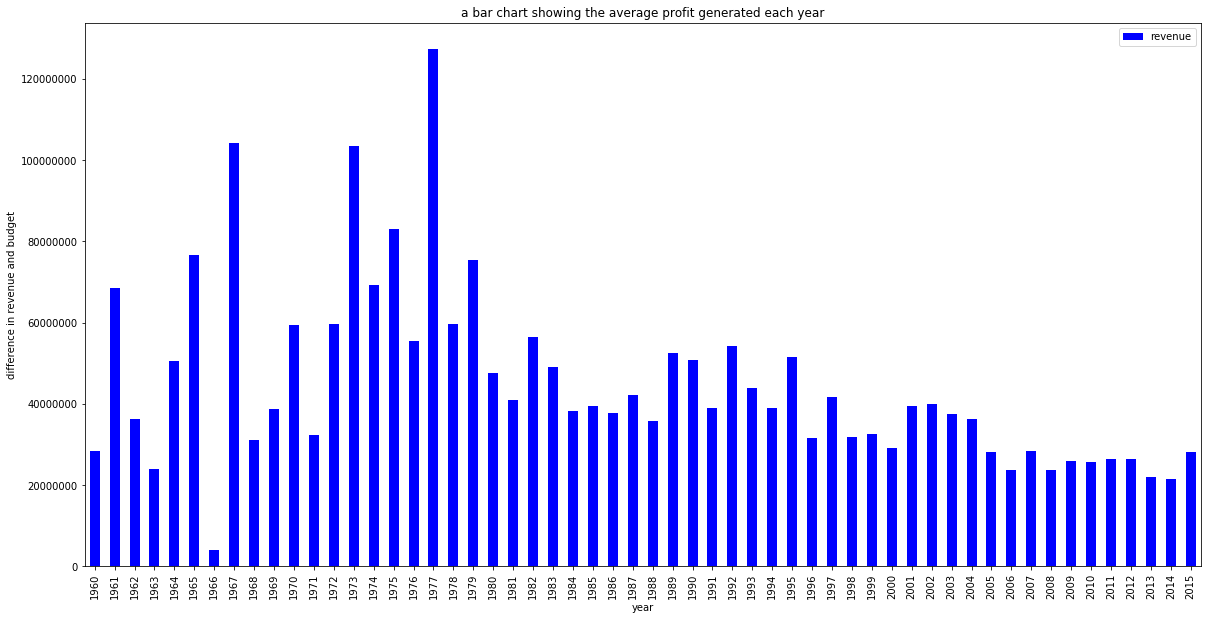

In [45]:
profit.plot(kind='bar',alpha=1, color= 'blue',figsize=(20,10), label='revenue',title='a bar chart showing the average profit generated each year',x='year',y='total profit')
plt.legend();
plt.xlabel('year')
ax=plt.gca()
plt.ylabel('difference in revenue and budget')
ax.get_yaxis().get_major_formatter().set_scientific(False)

the bar chart shows the distribution of the profit yearly

next i will compare the profit graph to the revenue graph

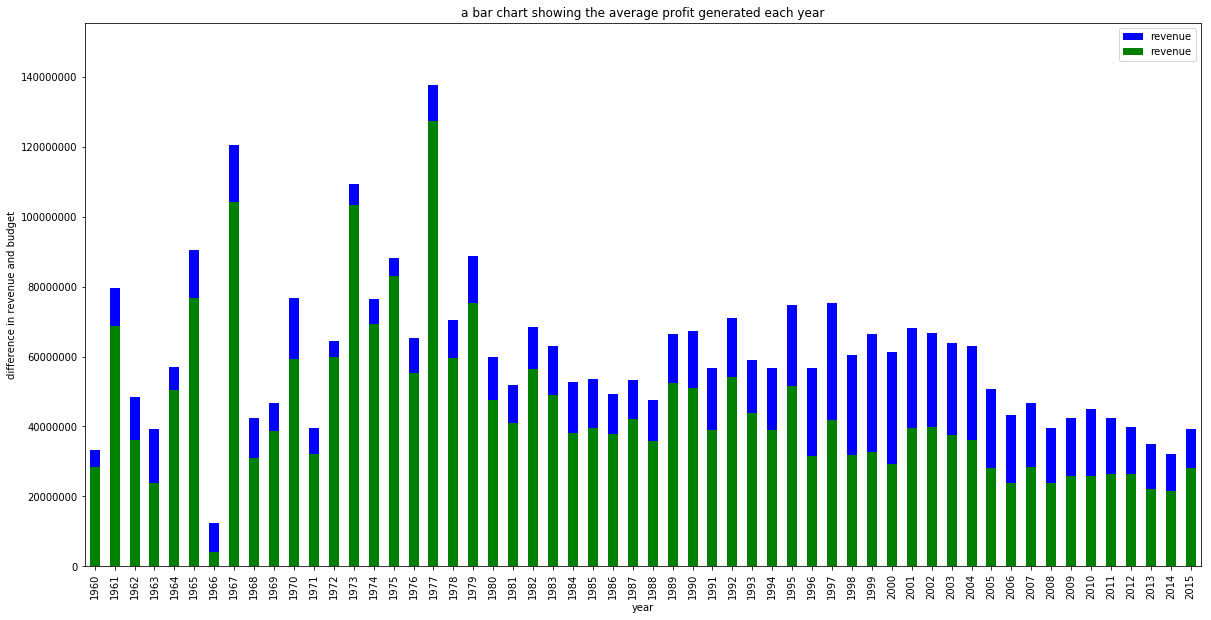

In [47]:
gr_rev.plot(kind='bar',alpha=1,ylim=(0,155495693), color= 'blue',figsize=(20,10), label='revenue',title='a bar chart showing the average revenue generated each year',x='year',y='total revenue')
plt.legend()
plt.xlabel('year')
ax=plt.gca()
plt.ylabel('average yearly revenue')
ax.get_yaxis().get_major_formatter().set_scientific(False)
profit.plot(kind='bar',alpha=1, color= 'green',figsize=(20,10), label='revenue',title='a bar chart showing the average profit generated each year',x='year',y='total profit')
plt.legend();
plt.xlabel('year')
ax=plt.gca()
plt.ylabel('difference in revenue and budget')
ax.get_yaxis().get_major_formatter().set_scientific(False)


the graph above compares the revenue to the estimated profit,it could be seen from the graph that high revenue is associated with high profit.

In [ ]:
code to covet object type profit column to flo

In [59]:
df['profit']=df['profit'].astype(float)
df.profit

0       135397.00000
1        76341.00000
2       262500.00000
3       140607.00000
4       168259.00000
5       281957.00000
6        87101.00000
7       286217.00000
8       211672.00000
9       150540.00000
10      206647.00000
11       76757.00000
12      264660.00000
13      257344.00000
14       99861.00000
15      273248.00000
16      260346.00000
17      102899.00000
18      150689.00000
19      131634.00000
20      158852.00000
21      307081.00000
22      254128.00000
23      216015.00000
24      318846.00000
25      177677.00000
26      214756.00000
27      207703.00000
28      314365.00000
29      294254.00000
            ...     
10836    38720.00000
10837    19728.00000
10838    22383.00000
10839    13353.00000
10840    34388.00000
10841    42701.00000
10842    36540.00000
10843    29710.00000
10844    23728.00000
10845     5065.00000
10846    17102.00000
10847    28763.00000
10848     2161.00000
10849    28270.00000
10850    26268.00000
10851    15347.00000
10852    3730

(0, 30000000)

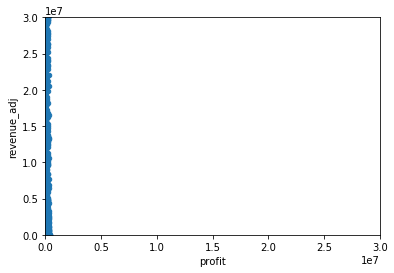

In [68]:
import statsmodels.api as sm
import scipy
bud_rev = sm.OLS(df.revenue_adj, sm.add_constant(df.profit))
p= bud_rev.fit().params
x=df.revenue_adj
ax_p=df.plot(x='profit', y='revenue_adj', kind='scatter')
ax_p.plot(x, p.const + p.profit*x)
ax_p.set_xlim([0,30000000])
ax_p.set_ylim([0,30000000])


A scatter plot showing the relationship between profit and revenue. the graph shows more correlation unlike the revenue comparism between budget. 

### Research Question 2  (WHICH MOVIE GENRE TYPE WAS POPULAR IN THE MOVIES RELEASED)
##### Some producers feel movie watchers prefer a specific kind of movie genre and hence add these movie genres to the movies they produce,this movie genre will be found in almost every movie produced yearly, i would to find out these movie genres

first i want to know the different kind of genres in each movie with the code below

In [69]:
df.genres

0              Action|Adventure|Science Fiction|Thriller
1              Action|Adventure|Science Fiction|Thriller
2                     Adventure|Science Fiction|Thriller
3               Action|Adventure|Science Fiction|Fantasy
4                                  Action|Crime|Thriller
5                       Western|Drama|Adventure|Thriller
6              Science Fiction|Action|Thriller|Adventure
7                        Drama|Adventure|Science Fiction
8                      Family|Animation|Adventure|Comedy
9                                Comedy|Animation|Family
10                                Action|Adventure|Crime
11              Science Fiction|Fantasy|Action|Adventure
12                                 Drama|Science Fiction
13                         Action|Comedy|Science Fiction
14                      Action|Adventure|Science Fiction
15                           Crime|Drama|Mystery|Western
16                                 Crime|Action|Thriller
17                      Science

the code creates a list of of the various genre list in the data

In [70]:
genre_list=['Action','Adventure','Science Fiction','Thriller','Drama','Crime','Fantasy','Romance','Horror','Mystery','Documentary','War','Foreign','Comedy','Western','Family']

the codes below counts the number of unique genre type in each row where available

In [71]:

count1=0
for i in df.genres:
    if i == 'Thriller':
        count1=count1 + 1
        
count2=0
for i in df.genres:
    if i == 'Action':
        count2=count2 + 1
        
count3=0
for i in df.genres:
    if i == 'Adventure':
        count3=count3 + 1
count4=0
for i in df.genres:
    if i == 'Science Fiction':
        count4=count4 + 1        

In [72]:
count5=0
for i in df.genres:
    if i == 'Drama':
        count5=count5 + 1
        
count6=0
for i in df.genres:
    if i == 'Crime':
        count6=count6 + 1
        
count7=0
for i in df.genres:
    if i == 'Fantasy':
        count7=count7 + 1
count8=0
for i in df.genres:
    if i == 'Romance':
        count8=count8 + 1      

In [73]:
count9=0
for i in df.genres:
    if i == 'Horror':
        count9=count9 + 1
        
count10=0
for i in df.genres:
    if i == 'Mystery':
        count10=count10 + 1
        
count11=0
for i in df.genres:
    if i == 'Documentary':
        count11=count11 + 1
count12=0
for i in df.genres:
    if i == 'War':
        count12=count12 + 1      

In [74]:
count13=0
for i in df.genres:
    if i == 'Foreign':
        count13=count13 + 1
        
count14=0
for i in df.genres:
    if i == 'Comedy':
        count14=count14 + 1
        
count15=0
for i in df.genres:
    if i == 'Western':
        count15=count15 + 1
count16=0
for i in df.genres:
    if i == 'Family':
        count16=count16 + 1     

code to convert the list to a data frame

In [75]:
genre_lis_pd=pd.DataFrame(genre_list,columns=['genre type'])

In [76]:
genre_count=[count1,count2,count3,count4,count5,count6,count7,count8,count9,count10,count11,count12,count13,count14,count15,count16]

In [77]:
genre_count

[93, 63, 22, 36, 712, 3, 11, 9, 253, 3, 312, 5, 1, 712, 18, 16]

code convert the list to dataframe

In [78]:
genre_lis_pd

,genre type
0,Action
1,Adventure
2,Science Fiction
3,Thriller
4,Drama
5,Crime
6,Fantasy
7,Romance
8,Horror
9,Mystery


new data frame created with the total number of each genre type

In [79]:
genre_lis_pd['genre_count']=genre_count
genre_lis_pd

,genre type,genre_count
0,Action,93
1,Adventure,63
2,Science Fiction,22
3,Thriller,36
4,Drama,712
5,Crime,3
6,Fantasy,11
7,Romance,9
8,Horror,253
9,Mystery,3


this code plots the different genre types to its total counts in the row

Text(0,0.5,'total counts ')

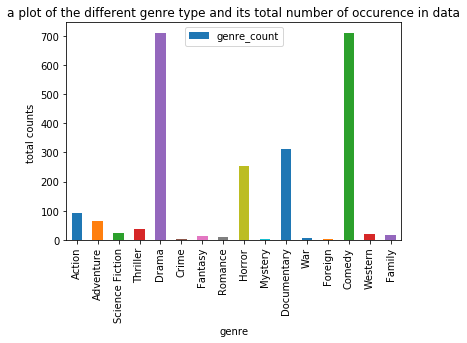

In [80]:
genre_lis_pd.plot(kind='bar',x='genre type', y='genre_count',title='a plot of the different genre type and its total number of occurence in data')
plt.xlabel('genre')
plt.ylabel('total counts ')

the above bar graph shows the various genre types and the number of times it occured in the movie produced each year from the graph Drame and comedy were common in the movie produced

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed in relation to the question(s) provided at the beginning of the analysis. Summarize the results accurately, and point out where additional research can be done or where additional information could be useful.

> **Tip**: Make sure that you are clear with regards to the limitations of your exploration. You should have at least 1 limitation explained clearly. 

> **Tip**: If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])